In [1]:
import pandas as pd
import numpy as np
import logging
from itertools import product


import matplotlib.pyplot as plt


logger = logging.getLogger()
logging.basicConfig(level=logging.DEBUG)

In [2]:
df = pd.read_csv('../data/correlated_data.csv')

In [3]:
df.head()

,X,Y
0,0.000000,-1.272994
1,1.851852,29.202382
2,3.703704,19.933030
3,5.555556,14.932924
4,7.407407,-5.532401


In [4]:
# predict y -> ax + b

In [5]:
n = len(df)  # the number of observations is directly the number of line in the dataframe
n

55

In [6]:
x = df['X']
y = df['Y']

# mean
y_mean = np.mean(y)
x_mean = np.mean(x)

In [7]:
a=np.sum((y-y_mean)*(x-x_mean))/np.sum((x-x_mean)**2)
a

np.float64(0.9690091520064417)

In [8]:
b=y_mean - a*x_mean
b

np.float64(0.616032346533963)

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Applications/anaconda3/envs/albert_school/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Applications/anaconda3/envs/albert_school/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 1.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Appli

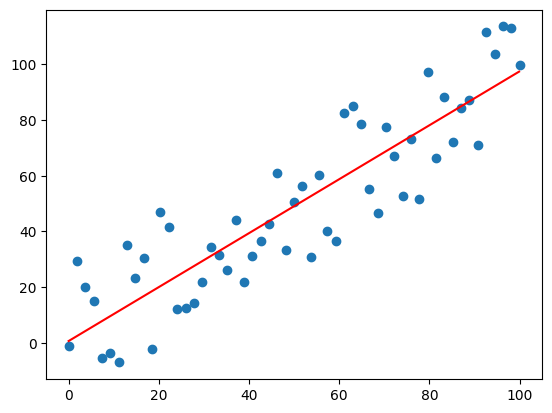

In [9]:
plt.scatter(x, y)


x_new = np.arange(0, 100, 0.1)
y_new = a*x_new+b

plt.plot(x_new, y_new, color='r')
plt.show()

In [10]:
y_pred = a*x+b
MSE = np.sum((y-y_pred)**2)/(n-2)
RMSE = np.sqrt(MSE)
print(f'MSE is equal to: {MSE:.3f}')
print(f'RMSE is equal to: {RMSE:.2f}')

MSE is equal to: 225.498
RMSE is equal to: 15.02


In [11]:
MAE = np.mean(np.abs(y-y_pred))
print(f'MAE is equal to: {MAE:.2f}')

MAE is equal to: 12.72


In [12]:
SSR = np.sum((y_pred - y_mean)**2)

In [13]:
SSE = np.sum((y - y_pred)**2)

In [14]:
SSTO = np.sum((y - y_mean)**2)

In [15]:
SSTO

np.float64(56581.869701440526)

In [16]:
SSR+SSE

np.float64(56581.86970144053)

In [17]:
assert np.isclose(SSTO, SSR+SSE)  # we can not assert directly the two sides are equal, because of python representation of float number (limited precision)
# for more information on this issue https://peps.python.org/pep-0485/#rationale

In [18]:
r_squared = SSR/SSTO
print(f'R² is equal to: {r_squared}')

R² is equal to: 0.7887768829951058


In [19]:
from sklearn.metrics import r2_score
r2_score(y_true=y, y_pred=y_pred)

0.7887768829951057

In [20]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_true=y, y_pred=y_pred)

12.720421007778096

In [21]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true=y, y_pred=y_pred) # this is normal it is different from the one we computed, the formula is not exactly the same on the denominator

217.2981615327828

# Gradient Descent

### Find the best fitted line using gradient descent

In [22]:
# your turn to fill this :)

In [23]:
def f(a,b,x): # fonction
    """
    a: coef directeur
    b: constante
    x : array
    """
    return a*x+b

def mse(a, b, x, y):
  return np.sum(np.square(y - (a*x+b)))/len(x)

In [24]:
# loss function chosen MSE because convex
def mse_db(y_data,x_data,a,b):
    # mse function derived with b
    n = len(x_data)
    x_mean = np.mean(x_data)
    y_mean = np.mean(y_data)
    return 2*n*(-y_mean +a*x_mean+b)

def mse_da(y_data,x_data,a,b): # ok
    # mse function derived with a
    n = len(x_data)
    x_mean = np.mean(x_data)
    y_mean = np.mean(y_data)
    return np.sum(((y_data-y_mean)-a*(x_data - x_mean))*(x_data - x_mean))*(-2/n)

def gradient_descent(point,n_iterations,x,y,alpha):
    """
    point : random point
    n : number of iterations
    """
    i=0
    a = [point[0]]
    b = [point[1]]
    while i!=n_iterations:
        i+=1
        a.append(a[-1]-alpha*mse_da(y,x,a[-1],b[-1]))
        b.append(b[-1]-alpha*mse_db(y,x,a[-2],b[-1]))
    print(f"Nb d'itération terminées au bout de {i}itération")
    logger.warning('Stop after %s iterations', i)
    return a[-1],b[-1]

# start at a random point
point_start = (0, 0)
a_g , b_g = gradient_descent(point_start,n_iterations=1e4,x=x,y=y,alpha=1e-4)
print(a_g, b_g)

Nb d'itération terminées au bout de 10000itération
0.9690091520064413 0.6160323465339822


In [25]:
def gradient_descent_stop_criterion(point,x,y,alpha, stop_criterion):
    """
    point : random point
    n : number of iterations
    """
    i=0
    a = point[0]
    b = point[1]
    grad_a = mse_da(y,x,a,b)
    grad_b = mse_db(y,x,a,b)
    while (grad_a**2 + grad_b**2)>=stop_criterion:
        i+=1
        a=a-alpha*grad_a
        b=b-alpha*grad_b
        grad_a =mse_da(y,x,a,b)
        grad_b = mse_db(y,x,a,b)
    logger.warning('Stop after %s iterations', i)
    return a, b

point_start = (0, 0)
a_g_stop , b_g_stop = gradient_descent_stop_criterion(point=point_start,x=x,y=y,alpha=0.0001, stop_criterion=1e-2)

In [26]:
print(a_g_stop, b_g_stop)

0.9690091520064413 0.6169330452225923


In [27]:
def gradient_descent_backtracking_line_search(point,x,y,alpha, beta, stop_criterion):
    """
    point : random point
    n : number of iterations
    """
    i=0
    a = point[0]
    b = point[1]
    grad_a = mse_da(y,x,a,b)
    grad_b = mse_db(y,x,a,b)
    while (grad_a**2 + grad_b**2)>=stop_criterion:
        i+=1
        if mse(a=a-alpha*grad_a, b=b-alpha*grad_b, x=x, y=y) < (mse(a=a, b=b, x=x, y=y)-alpha*(grad_a**2+ grad_b**2)/2):
          alpha *=beta
        a=a-alpha*grad_a
        b=b-alpha*grad_b
        grad_a =mse_da(y,x,a,b)
        grad_b = mse_db(y,x,a,b)
    logger.warning('Stop after %s iterations', i)
    return a, b
a_g_bls, b_g_bls = gradient_descent_backtracking_line_search(point=(0,0),x=x,y=y,alpha=0.001, beta=0.8, stop_criterion=1e-3)

first method:
y = 0.9690*x+0.6160
gradient method
y = 0.9690*x+0.6160
gradient method with stop criterion
y = 0.9690*x+0.6163
gradient method with stop criterion and backtracking line search
y = 0.9690*x+0.6163


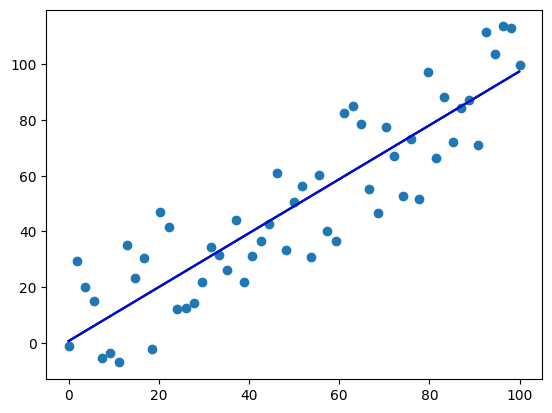

In [37]:
plt.scatter(x,y)
x_test = np.arange(0,100,0.1)
grad = lambda x: a_g*x+b_g
plt.plot(x_test, grad(x_test),color="red")

grad_stop = lambda x: a_g_stop*x+b_g_stop
plt.plot(x_test, grad_stop(x_test),color="green")

grad_bls = lambda x: a_g_bls*x+b_g_bls
plt.plot(x_test, grad_bls(x_test),color="green")

test = lambda x: a*x+b
plt.plot(x_test, test(x_test),color="blue")
print("first method:")
print(f"y = {a:.4f}*x+{b:.4f}")
print("gradient method")
print(f"y = {a_g:.4f}*x+{b_g:.4f}")
print("gradient method with stop criterion")
print(f"y = {a_g_stop:.4f}*x+{b_g_stop:.4f}")
print("gradient method with stop criterion and backtracking line search")
print(f"y = {a_g_bls:.4f}*x+{b_g_bls:.4f}")
plt.show()

In [29]:
A, B = np.meshgrid(np.arange(-10, 10, 1), np.arange(-10000, 10000, 100))

In [30]:
MSE = np.array([mse(a=a, b=b, x=x, y=y) for a, b in zip(A.ravel(), B.ravel())])
MSE = np.reshape(MSE, A.shape)

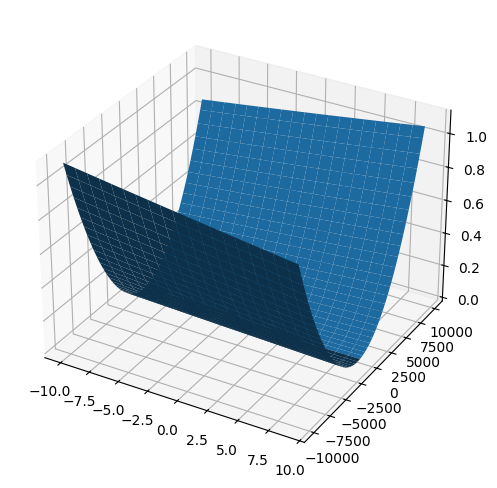

In [31]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(A, B, MSE)
plt.show()

In [32]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=MSE, x=A, y=B)])
fig.update_layout(title='Mean Squared Error', autosize=True,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [41]:
def gradient_descent_backtracking_line_search_iterative_point(point,x,y,alpha, beta, stop_criterion):
    """
    point : random point
    n : number of iterations
    """
    i=0
    a = point[0]
    b = point[1]
    grad_a = mse_da(y,x,a,b)
    grad_b = mse_db(y,x,a,b)
    points=[(a, b)]  # added
    while (grad_a**2 + grad_b**2)>=stop_criterion:
        i+=1
        if mse(a=a-alpha*grad_a, b=b-alpha*grad_b, x=x, y=y) < (mse(a=a, b=b, x=x, y=y)-alpha*(grad_a**2+ grad_b**2)/2):
          alpha *=beta
        a=a-alpha*grad_a
        b=b-alpha*grad_b
        points.append((a, b))  # added
        grad_a =mse_da(y,x,a,b)
        grad_b = mse_db(y,x,a,b)
    logger.warning('Stop after %s iterations', i)
    return a, b, points
a_g_bls, b_g_bls, points = gradient_descent_backtracking_line_search_iterative_point(point=(-5,-5),x=x,y=y,alpha=0.001, beta=0.8, stop_criterion=1e-3)

In [42]:
A, B = np.meshgrid(np.arange(-6, 2, 0.1), np.arange(-100, 200, 1))
MSE = np.array([mse(a=a, b=b, x=x, y=y) for a, b in zip(A.ravel(), B.ravel())])
MSE = np.reshape(MSE, A.shape)
fig = go.Figure(data=[go.Surface(z=MSE, x=A, y=B)])
a_points, b_points = zip(*points)

fig.add_scatter3d(x=a_points, y=b_points, z=[mse(a=a, b=b, x=x, y=y) for (a,b) in points])
fig.update_layout(title='Mean Squared Error Gradient Descent with Backtracking Line Search', autosize=True,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [43]:
# Gradient descent visualization on gradient descent with stop criterion

def gradient_descent_stop_criterion_point(point,x,y,alpha, stop_criterion):
    """
    point : random point
    n : number of iterations
    """
    i=0
    a = point[0]
    b = point[1]
    points = [(a,b)]
    grad_a = mse_da(y,x,a,b)
    grad_b = mse_db(y,x,a,b)
    while (grad_a**2 + grad_b**2)>=stop_criterion:
        i+=1
        a=a-alpha*grad_a
        b=b-alpha*grad_b
        points.append((a,b))
        grad_a =mse_da(y,x,a,b)
        grad_b = mse_db(y,x,a,b)
    logger.warning('Stop after %s iterations', i)
    return a, b, points

point_start = (-5, -5)
a_g_stop , b_g_stop, points = gradient_descent_stop_criterion_point(point=point_start,x=x,y=y,alpha=0.1, stop_criterion=1e-3)

/var/folders/dr/m9v4shms079d9s6z6c8cg57m0000gn/T/ipykernel_35782/1747625137.py:14: RuntimeWarning:

overflow encountered in scalar power

/Applications/anaconda3/envs/albert_school/lib/python3.11/site-packages/numpy/_core/_methods.py:51: RuntimeWarning:

overflow encountered in reduce

/var/folders/dr/m9v4shms079d9s6z6c8cg57m0000gn/T/ipykernel_35782/671268147.py:7: RuntimeWarning:

overflow encountered in scalar multiply

/var/folders/dr/m9v4shms079d9s6z6c8cg57m0000gn/T/ipykernel_35782/1747625137.py:16: RuntimeWarning:

invalid value encountered in scalar subtract

/var/folders/dr/m9v4shms079d9s6z6c8cg57m0000gn/T/ipykernel_35782/1747625137.py:17: RuntimeWarning:

invalid value encountered in scalar subtract



In [44]:
A, B = np.meshgrid(np.arange(-6, 2, 0.1), np.arange(-100, 200, 1))
MSE = np.array([mse(a=a, b=b, x=x, y=y) for a, b in zip(A.ravel(), B.ravel())])
MSE = np.reshape(MSE, A.shape)
fig = go.Figure(data=[go.Surface(z=MSE, x=A, y=B)])
a_points, b_points = zip(*points)

fig.add_scatter3d(x=a_points, y=b_points, z=[mse(a=a, b=b, x=x, y=y) for (a,b) in points])
fig.update_layout(title='Mean Squared Error with Gradient Descent', autosize=True,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

/Applications/anaconda3/envs/albert_school/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

overflow encountered in square

